# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных. 

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 10 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [24]:
### BEGIN YOUR CODE

Student_ID = None

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [25]:
datasets = [('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

ОШИБКА! Не указан порядковый номер студента в списке группы.


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [2]:
### BEGIN YOUR CODE

import pandas as pd

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [ ]:
### BEGIN YOUR CODE

# !wget PLACE_DATASET_URL_HERE

# !unzip ...
# !tar ...
# !gunzip ...

# dataset = pd.read_csv

### END YOUR CODE

####  3. Посмотреть на общую картину (1 балл)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [ ]:
### BEGIN YOUR CODE

dataset.describe()

### END YOUR CODE

**Здесь должен быть ваш текст**
<!-- Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками. Некоторые из них могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели. 

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`. 

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling): 

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

In [ ]:
### BEGIN YOUR CODE

# рекомендуется разбить выборку на обучающую и тестовую, например, с помощью StratifiedShuffleSplit из sklearn.model_selection

# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы. 

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [28]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:    
    """
    Перечень действий, которые можно выполнить с моделью
    """
    
    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.0  # скорость обучения
        self.cost  = 0    # значение функционала качества обученной модели (значение функции стоимости)

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций
        
        Выходные данные: 
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """
        # поместите сюда ваш код
        return self.theta, self.cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        # поместите сюда ваш код для инициализации алгоритма подбора параметров методом градиентного спуска
        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        #  поместите сюда ваш код для задания 5
        return self.cost

    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        # поместите сюда ваш код 
        y_predict = None
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"



my_model = LinearRegressionModel()
# поместите сюда ваш код для вызова экземпляра класса LinearRegressionModel

print(my_model)

Вектор параметров: None


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

Text(0.5, 1.0, 'Error vs. Training Iterations')

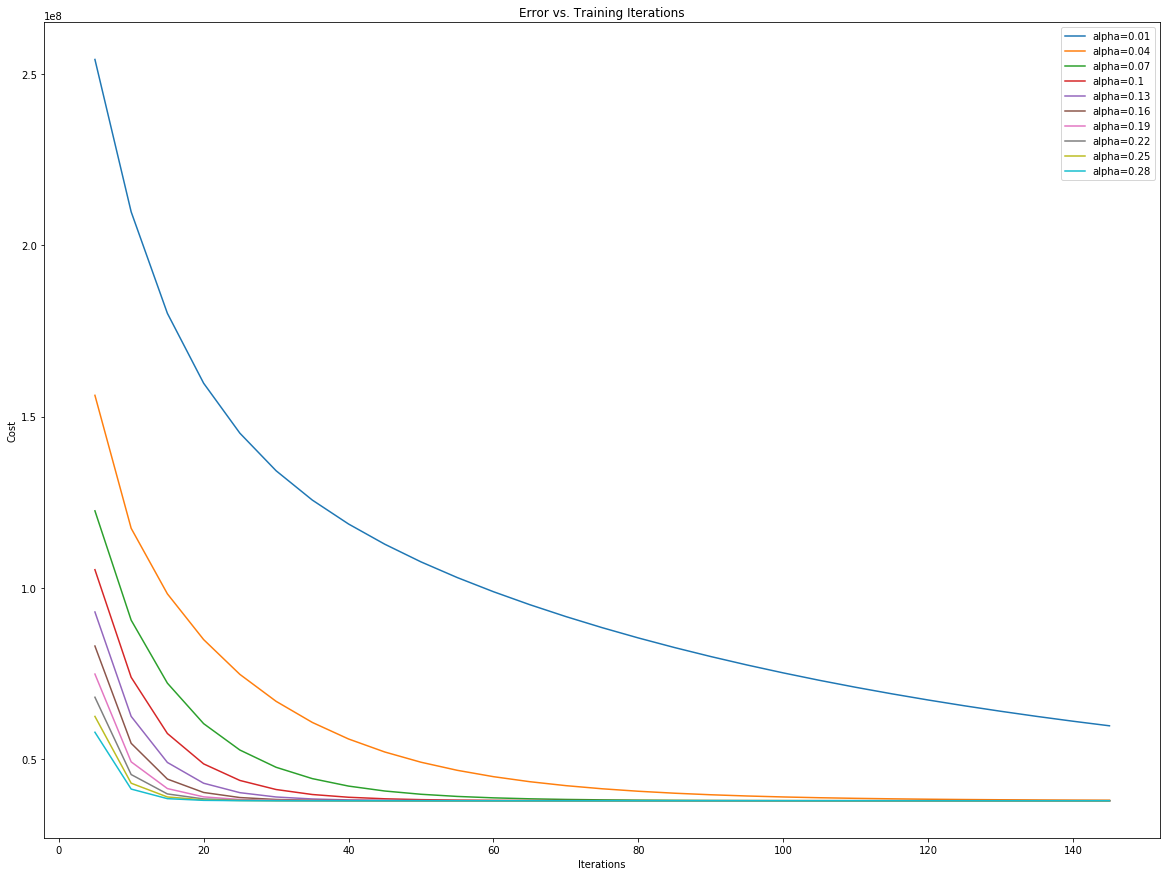

In [34]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(20, 15))
# поместите сюда ваш код 
iters = []

for i in range(0, 90, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model.alpha = i / 100
    costs = []
    for j in iters:
        costs.append(my_model.fit_with_GD(X_train, y_train, j))
    plt.plot(iters, costs)
    

# не забудьте про легенду
plt.xlabel('Количество итераций')  
plt.ylabel(r'Функция качества $Q(\theta)$')  
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')  


*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 5. Решить систему нормальных уравнений (метод наименьших квадратов) (1 балл)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [ ]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем, 
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

- - -
#### 6. Сравнить разные методы (2 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+1 дополнительный балл за добавление к сравнению еще двух методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) и гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html)).

In [ ]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train, y_train)
y_predict = my_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# поместите сюда ваш код 

*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 7. Опишите полученные результаты (1 балл)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

*Поместите сюда свой текст*

- - - 
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.